Zadanie wykonane w grupie:<br>
Maciej Rosiński 239493<br>
Maciej Karpiński 239478<br>
Łukasz Wawrzyniak 239499<br>

In [ ]:
!pip install -q tflite-model-maker


     |████████████████████████████████| 573kB 9.9MB/s 
     |████████████████████████████████| 706kB 21.7MB/s 
     |████████████████████████████████| 6.3MB 38.3MB/s 
     |████████████████████████████████| 112kB 42.5MB/s 
     |████████████████████████████████| 1.1MB 33.0MB/s 
     |████████████████████████████████| 122kB 41.8MB/s 
     |████████████████████████████████| 174kB 27.5MB/s 
     |████████████████████████████████| 71kB 8.0MB/s 
     |████████████████████████████████| 645kB 32.6MB/s 
     |████████████████████████████████| 92kB 8.7MB/s 
     |████████████████████████████████| 1.2MB 31.0MB/s 
     |████████████████████████████████| 849kB 30.2MB/s 
     |████████████████████████████████| 133kB 41.6MB/s 
     |████████████████████████████████| 194kB 40.8MB/s 
     |████████████████████████████████| 358kB 38.9MB/s 
     |████████████████████████████████| 38.2MB 75kB/s 
     |████████████████████████████████| 102kB 10.3MB/s 


In [ ]:
import os

import numpy as np

import tensorflow as tf
assert tf.__version__.startswith('2')

from google.colab import files

from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.image_classifier import DataLoader
from tflite_model_maker.image_classifier import ModelSpec

import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
!wget https://gitlab.com/wawrzyniak_pwoi/sieci-konwolucyjne-cnn/-/raw/master/database.zip

--2021-05-11 19:13:36--  https://gitlab.com/wawrzyniak_pwoi/sieci-konwolucyjne-cnn/-/raw/master/database.zip
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23748202 (23M) [application/zip]
Saving to: ‘database.zip.5’

database.zip.5      100%[===================>]  22.65M  7.95MB/s    in 2.8s    

2021-05-11 19:13:40 (7.95 MB/s) - ‘database.zip.5’ saved [23748202/23748202]



In [9]:
!mkdir /content/database

In [10]:
!unzip database

Archive:  database.zip
   creating: database/damskie/
  inflating: database/damskie/035_black-white-kwadraty.jpg  
  inflating: database/damskie/1 (1).jpeg  
  inflating: database/damskie/1 (1).jpg  
 extracting: database/damskie/1 (1).png  
  inflating: database/damskie/1 (10).jpg  
  inflating: database/damskie/1 (11).jpg  
  inflating: database/damskie/1 (12).jpg  
  inflating: database/damskie/1 (13).jpg  
  inflating: database/damskie/1 (14).jpg  
  inflating: database/damskie/1 (15).jpg  
  inflating: database/damskie/1 (16).jpg  
  inflating: database/damskie/1 (17).jpg  
  inflating: database/damskie/1 (18).jpg  
  inflating: database/damskie/1 (19).jpg  
  inflating: database/damskie/1 (2).jpeg  
  inflating: database/damskie/1 (2).jpg  
  inflating: database/damskie/1 (2).png  
  inflating: database/damskie/1 (20).jpg  
  inflating: database/damskie/1 (21).jpg  
  inflating: database/damskie/1 (22).jpg  
  inflating: database/damskie/1 (23).jpg  
  inflating: database/damskie

In [11]:
image_path = '/content/database'

In [12]:
data = DataLoader.from_folder(image_path)
train_data, rest_data = data.split(0.79)
validation_data, test_data = rest_data.split(0.5)

INFO:tensorflow:Load image with size: 354, num_label: 6, labels: damskie, kalosze, klapki, sportowe, wyjsciowe, zimowe.


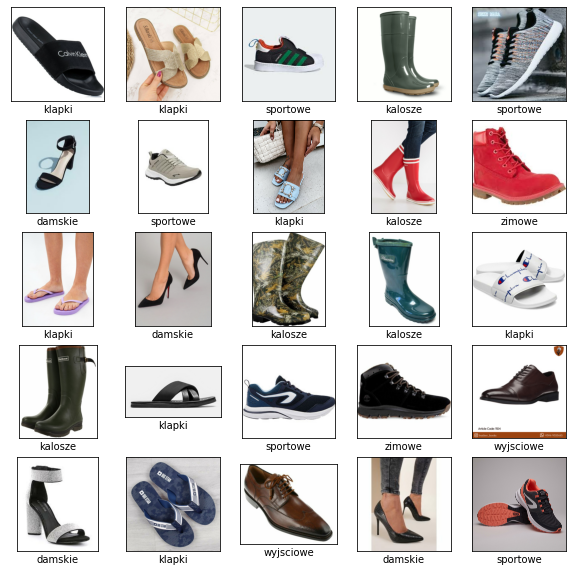

In [13]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(data.gen_dataset().unbatch().take(25)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(data.index_to_label[label.numpy()])
plt.show()


In [14]:
model = image_classifier.create(train_data, validation_data=validation_data, epochs=50)



INFO:tensorflow:Retraining the models...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2 (HubKer (None, 1280)              3413024   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 6)                 7686      
Total params: 3,420,710
Trainable params: 7,686
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/50
8/8 [==============================] - 40s 1s/step - loss: 1.8665 - accuracy: 0.1900 - val_loss: 1.4804 - val_accuracy: 0.4062
Epoch 2/50
8/8 [==============================] - 7s 1s/step - loss: 1.3410 - accuracy: 0.6160 - val_loss: 1.0178 - val_accuracy: 0.7812
Epoch 3/50
8/8 [==============================] - 7

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2 (HubKer (None, 1280)              3413024   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 6)                 7686      
Total params: 3,420,710
Trainable params: 7,686
Non-trainable params: 3,413,024
_________________________________________________________________


In [16]:
loss, accuracy = model.evaluate(test_data)

2/2 [==============================] - 2s 529ms/step - loss: 0.6134 - accuracy: 0.9474


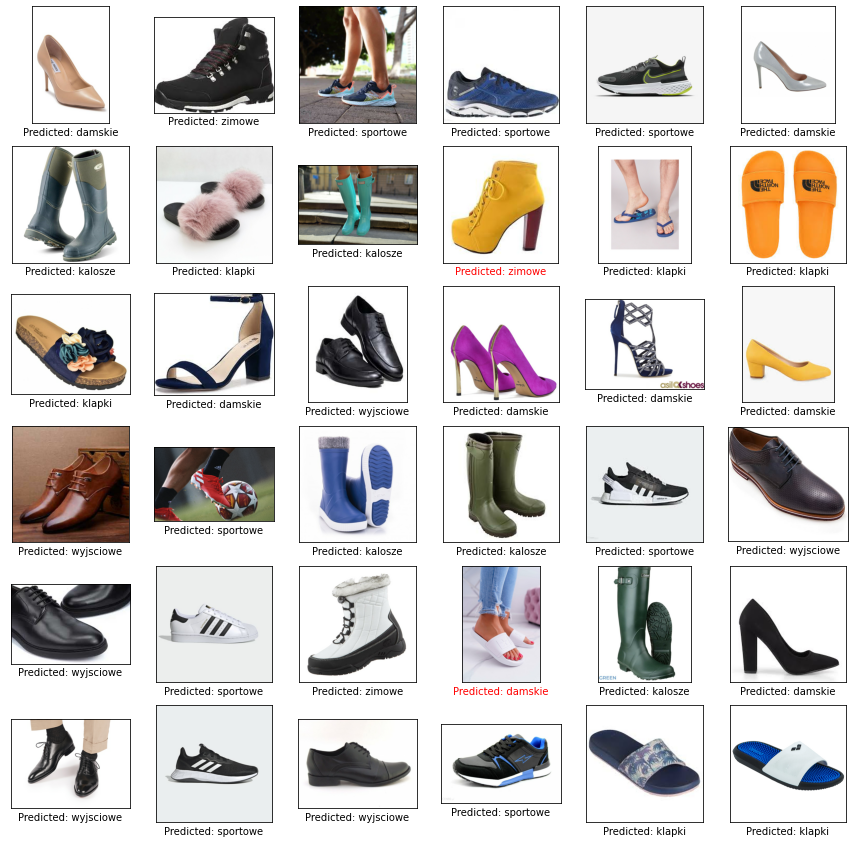

In [17]:
# A helper function that returns 'red'/'black' depending on if its two input
# parameter matches or not.
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# Then plot 100 test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.
plt.figure(figsize=(15, 15))
predicts = model.predict_top_k(test_data)
for i, (image, label) in enumerate(test_data.gen_dataset().unbatch().take(36)):
  ax = plt.subplot(6, 6, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Predicted: %s' % predict_label)
plt.show()

In [18]:
model.export(export_dir='.')

INFO:tensorflow:Assets written to: /tmp/tmp_uwhgdbg/assets


INFO:tensorflow:Assets written to: /tmp/tmp_uwhgdbg/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmp43hba3rg/labels.txt.


INFO:tensorflow:Saving labels in /tmp/tmp43hba3rg/labels.txt.


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model.tflite
